# REST API
- Representational State Transfer
- Client와 Server가 통신하기 위한 URL 구조에 대한 정의 및 디자인

## 1\. Kakao API

In [1]:
import warnings
warnings.filterwarnings('ignore') # 경고 문구 출력 x
import pandas as pd # 데이터 수집 후 csv 파일로 만들때
import requests, json

### 1-1. request token 얻기
- `https://developers.kakao.com/`
- 내 애플리케이션 > 애플리케이션 추가하기

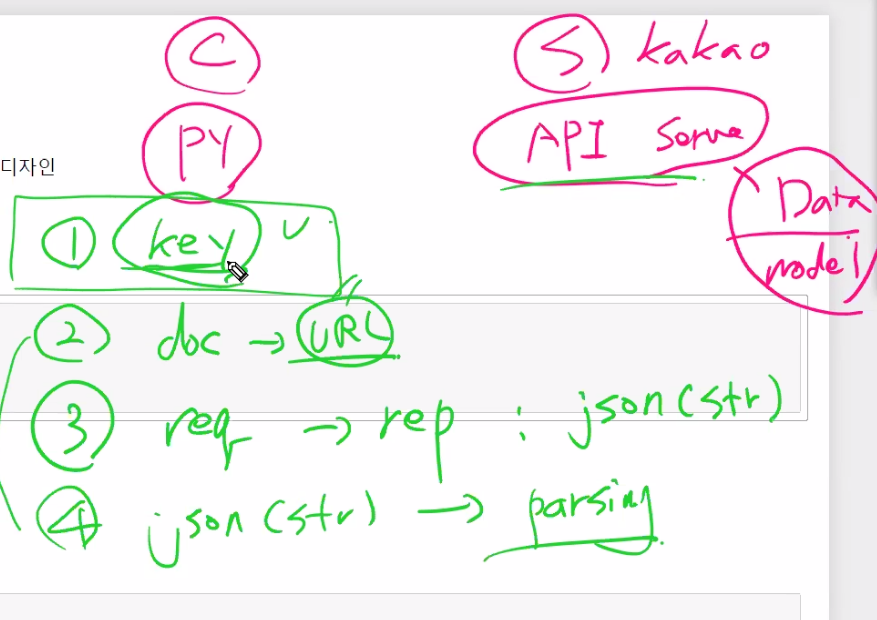

In [3]:
REST_API_KEY = '5c256b8618c790e446427afa8af4742d'

### 1-2. KoGPT
- 문서 > KoGPT > REST API
- tokens : 공백을 제외한 글자수

In [4]:
# 1. document : URL
url = 'https://api.kakaobrain.com/v1/inference/kogpt/generation'

In [5]:
# 2. request(URL) > response : json(str)
prompt = "원자폭탄을 개발한 사람은"
params = {'prompt' : prompt, 'max_tokens' : 50} # 공백제외 글자수(max_tokens)
headers = {'Authorization' :f'KakaoAK{REST_API_KEY}', 'Content-Type' : 'application/json'}

In [7]:
response = requests.post(url, json.dumps(params), headers = headers)
response

<Response [200]>

In [8]:
# 3. json(str) > parsing : text
json.dumps(params)

'{"prompt": "\\uc6d0\\uc790\\ud3ed\\ud0c4\\uc744 \\uac1c\\ubc1c\\ud55c \\uc0ac\\ub78c\\uc740", "max_tokens": 50}'

#### 1. 다음문장 만들기

In [10]:
texts = response.json()['generations']
texts = [text['text'] for text in texts]
texts

[' 오펜하이머라 하는 유대인 과학자였다. 그들 나름대로의 우연적인 판단과 제2차 세계대전이라는 정치적 목적(극비리에 핵무기를 설계하다가 나중에 전쟁중인 미국에서 그것도 비밀리에 텔아']

#### 2. 문장 분류하기
- 문장 마다 `=긍정`, `=부정` 문자열 작성
- 분류할 마지막 문장 `=` 문자열 작성

#### 3. 뉴스 한 줄 요약하기
- 마지막에 `한줄 요약:` 문자열 작성

#### 4. 질문에 답변하기
- 문장 마지막에 `?:` 로 끝남

#### 5. 응용하기

## 2\. Naver API
- 통합검색어 트렌드 API
    - https://datalab.naver.com/
    - https://datalab.naver.com/keyword/trendSearch.naver

### 2-1. Request Token 얻기
- `https://developers.naver.com`
- 1. Request Token 얻기 : 애플리케이션등록 -> app_key 획득
- 2. app_key를 이용해서 데이터 가져오기

### 2-2. 통합검색어 트렌드 API
- 서비스 : `https://datalab.naver.com/keyword/trendSearch.naver`
- 내 애플리케이션 > dss 애플리케이션 > API 설정 > 데이터랩(검색어 트렌드) 추가
- 사용법 : `https://developers.naver.com/docs/serviceapi/datalab/search/search.md#통합-검색어-트렌드`